In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
# Show all columns
pd.set_option('display.max_columns', None)

In [2]:
# Read the data
player = pd.read_csv('data/player_stats.csv')

In [3]:
# Drop all all columns with missing values in salary column
player = player.dropna(subset=['salary'])
# Adjust for inflation
player["adj_salary"] = [cpi.inflate(salary, year, to=2016) for salary, year in zip(player.salary, player.yearID)]

<AxesSubplot: >

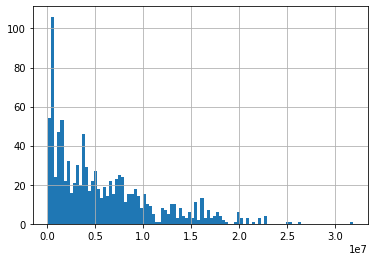

In [27]:
player["adj_salary"].hist(bins=100)

<AxesSubplot: >

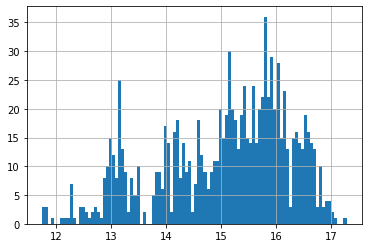

In [26]:
# Log transform the salary
player["log_salary"] = np.log(player["adj_salary"])
# Filter out only players from NL 
player = player[player["lgID"] == "NL"]
player["log_salary"].hist(bins=100)

<AxesSubplot: >

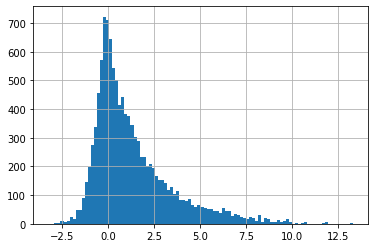

In [12]:
player["br_WAR_total"].hist(bins=100)

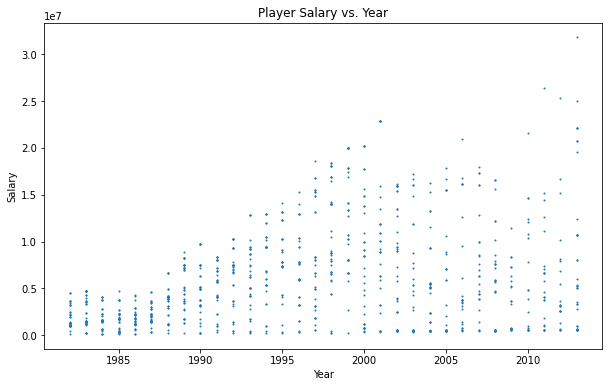

In [29]:
# plot player salary vs. year
plt.figure(figsize=(10, 6))
plt.scatter(player.yearID, player.adj_salary, s=1)
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Player Salary vs. Year')
plt.show()

/var/folders/ks/84b6fb594mg0n57lspnlf0nm0000gn/T/ipykernel_76746/1449218481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player['YearID'] = player['yearID'] - 1


Slope:  [0.10892545]
Intercept:  14.465844652825773
R^2 score:  0.05051338747705314


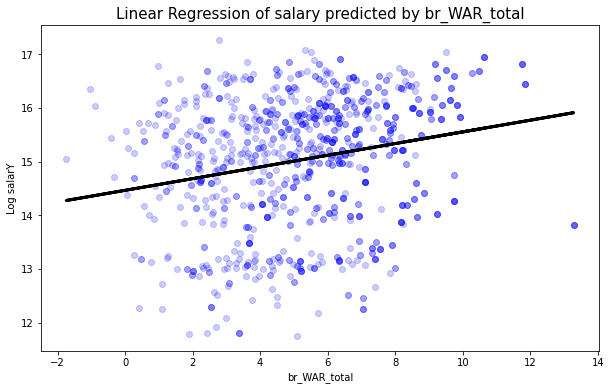

In [28]:
# Create a Linear regression of salarY predicted bY br_WAR_total for 2014 season onlY
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Adjust the Year column bY subtracting 1 from all Years
player['YearID'] = player['yearID'] - 1


# Create X and Y
X = player[['br_WAR_total']]
Y = player['log_salary']
# Create a linear regression object
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X, Y)

# Print the coefficients
print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)
# Print the R^2 for the model against the test data
print("R^2 score: ", reg.score(X, Y))

# Plot the model
# Figure size
plt.figure(figsize=(10, 6))
plt.scatter(X, Y,  color='blue', alpha = 0.2)
plt.plot(X, reg.predict(X), color='black', linewidth=3)
# x_label
plt.xlabel('br_WAR_total', size =10)
# Y_label
plt.ylabel('Log salarY', size = 10)
# title
plt.title('Linear Regression of salary predicted by br_WAR_total', size = 15)
# show the plot
plt.show()

In [31]:
# Correlation between br_WAR_total and salary
player[['br_WAR_total', 'adj_salary']].corr()

,br_WAR_total,adj_salary
br_WAR_total,1.000000,0.256377
adj_salary,0.256377,1.000000
